<a id="intro"></a>

## 1. Introduction

#### The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean on the 15th of April 1912, after striking an iceberg during her maiden voyage from Southhampton to New York. Of the estimated 2,224 passengers and crew abroard, more than 1,500 died, making the disaster at the time one of the deadliest and most tragic.

#### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


[back to top](#table_of_contents)

<a id="table_of_contents"></a>
### Table of Contents

1. [Introduction](#intro)
    * 1.1 [Problem Statement](#problem_statement)
    * 1.2 [Data Gathering](#data_gathering)
2. [Setup](#setup)
    * 2.1 [Importing the Data](#import)
3. [General](#general)
    * 3.1 [Shape](#shape)
    * 3.2 [Statistics](#stats)
    * 3.3 [Hygiene](#hygiene)
4. [Data Cleaning](#data_cleaning)
    * 4.1 [Completing](#completing)
    * 4.2 [Correcting](#correcting)
    * 4.3 [Creating](#creating)
    * 4.4 [Converting](#converting)
5. [Exploratory Data Analysis](#eda)
    * 5.1 [Categorical Features EDA](#categorical_eda)
    * 5.2 [Continuous Features EDA](#continuous_eda)
    * 5.3 [Data Recheck](#data_recheck)
    * 5.4 [Correlations](#correlations)
6. [Modelling](#modelling)
    * 6.1 [Blind runs](#blind)
7. [Model Tuning](#tuning)
    * 7.1 [Random Forest Tuning](#feature_selection)
    * 7.2 [Logistic Regression Tuning](#lrtuning)
    * 7.3 [K Nearest Neighbors Tuning](#knntuning)
    * 7.4 [Support Vector Tuning](#svctuning)
8. [Building an Ensemble Model](#ensemble)
    * 8.1 [Classifier Selection](#selection)
    * 8.2 [Evaluating Ensembles](#evaluation)
    * 8.3 [Soft Vote Evaluation](#sveval)
    * 8.4 [Random Forest Evaluation](#rfeval)
9. [Visualizing Rules w/ Decision Tree](#dt)
    * 9.1 [Feature Selection](#dtfs)
    * 9.2 [Hyperparameter Tuning](#dtht)
    * 9.3 [DT Graphviz](#dtviz)

<a id="problem_statement"></a>

## 1.1 Problem Statement

#### The central challenge here is simple: given information about the passengers on the night of the sinking, can we build a predictive model that answers the question: what kinds of passengers were more likely to survive the sinking?

* The goal of this project is to apply the data science process to address the central challenge
* The data science involves identifying the problem statement, collecting the necessary data, exploratory data analysis, modelling, and validation

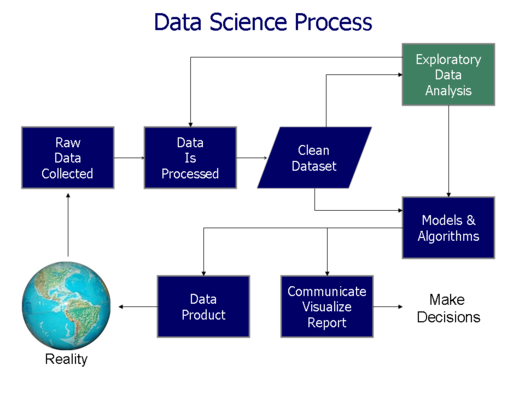

[back to top](#table_of_contents)

<a id="data_gathering"></a>

## 1.2 Data Gathering


#### The dataset in question contains historical records of:

* Passenger class: which can be used as a proxy for socio-economic status (SES)

* Sibings Spouses: Representing the number of siblings / spouses the passenger had onboard with them

* Parents Children: Representing the parents / children the passenger had onboard with them

* Ticket Price: The price of the ticket paid for by the passenger 

* Age, Gender

* A copy of the dataset can be found [here](https://www.kaggle.com/c/titanic)

[back to top](#table_of_contents)

<a id="setup"></a>

## 2. Setup

#### Packages required

* Data manipulation - numpy and pandas
* Visualization - matplotlib, seaborn
* Modelling - sklearn for preprocessing and training
* Validation - sklearn metrics

[back to top](#table_of_contents)

In [1]:
# Manipulation  
import numpy as np 
import pandas as pd
# import re

# Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

# ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

# Modelling 
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
import xgboost as xgb

# Preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
# For feature selection
from sklearn.feature_selection import SelectFromModel, RFECV, RFE

# Validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, ShuffleSplit, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score, precision_score, recall_score, plot_confusion_matrix

import os

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


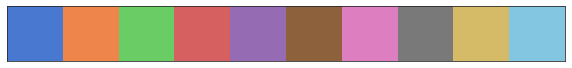

In [2]:
# Set styles 
%matplotlib inline
sns.set_style('white')
sns.set_palette('muted')

mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '--'
mpl.rcParams['font.size'] = 12

background_color = '#f6f5f5'
col_blue = '#4878d0'
col_orange = '#ee854a'

# Colour palette hex references 
pal = sns.color_palette('muted')
sns.palplot(pal)
print(pal.as_hex())

<a id = 'import'></a>
## 2.1 Importing the Data

[back to top](#table_of_contents)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/csanry/machinelearning/main/titanic_classification/DATA/titanic.csv')

In [4]:
# print out the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id="general"></a>

## 3. General 

#### Notes from the initial familiarization of the dataset here

* Dataset has 5 categorical variables
* Dataset has 5 continuous variables
* Dataset has one unique id and one target variable 'survived'
* Dataset has 891 rows and 12 columns 

[back to top](#table_of_contents)

<a id="shape"></a>
## 3.1 Shape

[back to top](#table_of_contents)

In [5]:
print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Dataset has 891 rows and 12 columns


<a id='stats'></a>

## 3.2 Statistics 

[back to top](#table_of_contents)

In [6]:
# Familiarization 
print(df.info())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<a id = 'hygiene'></a>

## 3.3 Hygiene 

#### Convert column names to lowercase

[back to top](#table_of_contents)

In [7]:
# Convert columns names to lowercase
df.columns = [c.lower() for c in df.columns]

In [8]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [9]:
# View 5 random passengers in the dataset
df.sample(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
598,599,0,3,"Boulos, Mr. Hanna",male,NaN,0,0,2664,7.2250,NaN,C


<a id='data_cleaning'></a>
## 4. Data Cleaning

#### The data cleaning step involves going through the variables and applying the framework of the 4Cs
1. Completing - are there any **missing values**? 
 * Age: strategy is to fill in with median age
 * Embarked: strategy is to fill in with the mode 
 * Drop: cabin, passenger id, ticket
2. Correcting - are there any values that **look weird**? 
 * To check: any negative ages? 
 * To check: any duplicate values?
3. Creating - are there any features that we can **engineer** to help solve our problem?  
 * Naming format: surname, title. firstname, middle name 
 * For females, maiden name in brackets () - Married = if maiden name present
 * Family size = Siblings + Spouse + Parents + Children + 1
 * Travelling alone = (Family size = 1)
4. Converting - are all features in the **right dtypes?** 
 * Target: survived
 * Convert to category: age and fare
 * Categorical: pclass, sex, embarked, title, solo, age bin, fare bin
 * Continuous: age, sibsp, parch, fare, familysize
 * Drop: maiden, name


[back to top](#table_of_contents)

<a id="completing"></a>
## 4.1 Completing

#### Observations
* Some key questions to ask: are there any missing values? Are there missing columns in the dataset? Can we drop any variables?
* Cabin feature has a lot of missing values
* Age has some missing values 
* Embarked has 2 missing values
* To drop: cabin, passengerid, ticket

[back to top](#table_of_contents)

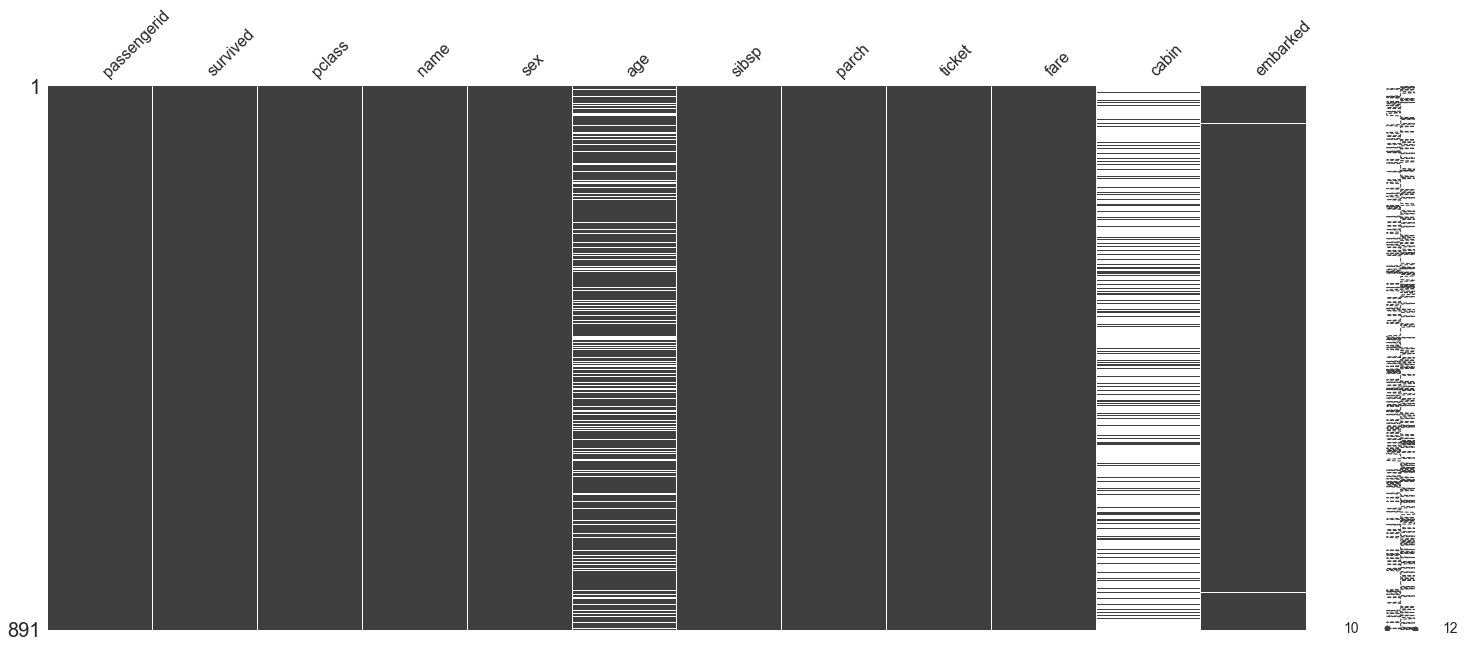

In [10]:
msno.matrix(df)
plt.show()

#### Majority of the missing values are coming from the cabin and age variables

In [11]:
print(f'There are {df.isna().sum().sum()} missing values in the dataset')

There are 866 missing values in the dataset


#### For age and fare, fill in the missing values via imputing the median, for embarked, fill in the mode

In [12]:
# age 
df['age'].fillna(df['age'].median(), inplace = True)

# fare
df['fare'].fillna(df['fare'].median(), inplace = True)

# embarked
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)

#### The cabins feature has a significant number of missing values, exploring them reveals unique identifiers for rooms

In [13]:
# Exploring the cabins feature
df['cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
F33            3
              ..
B41            1
D56            1
D49            1
D30            1
B3             1
Name: cabin, Length: 147, dtype: int64

#### We find out that many of the cabins belonged to first class passengers

**Results from some desk research:**

The allocation of cabins on the Titanic is a source of continuing interest and endless speculation. Apart from the recollections of survivors and a few tickets and boarding cards, the only authoritative source of cabin data is the incomplete first class passenger list recovered with the body of steward Herbert Cave

**As the cabins are likely to indicate that the passenger was first class, and to avoid further assumptions, let's drop the cabin variable**

In [14]:
df.loc[~(df['cabin'].isna()), 'pclass'].value_counts()

1    176
2     16
3     12
Name: pclass, dtype: int64

#### Variables 'ticket' and 'passengerid' are unique identifiers that can be dropped after confirming that there are no duplicates

In [15]:
drop_features = ['cabin', 'ticket', 'passengerid']

In [16]:
df.drop(drop_features, axis = 1, inplace = True)
print(f'There are {df.isna().sum().sum()} missing values in the dataset')

There are 0 missing values in the dataset


<a id='correcting'></a>

## 4.2 Correcting 

#### Observations

* Are there any negative values where there shouldn't be? Are there any non-integers where there shouldn't be? Any duplicated entries?
* Post examination: Values generally look correct 
* Women names seem to have their husband's at the start - to explore extracting married couples

[back to top](#table_of_contents)

#### Exploring value counts and unique values range 

In [17]:
df[['age', 'sibsp', 'parch']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,891.0,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
sibsp,891.0,0.523008,1.102743,0.00,0.0,0.0,1.0,8.0
parch,891.0,0.381594,0.806057,0.00,0.0,0.0,0.0,6.0


#### None of 'age', 'sibsp', and 'parch' should have negative values

In [19]:
## CORRECTING

for col in df.columns: 
    print(df[col].value_counts())
    print(df[col].unique())

0    549
1    342
Name: survived, dtype: int64
[0 1]
3    491
1    216
2    184
Name: pclass, dtype: int64
[3 1 2]
Partner, Mr. Austen                    1
Skoog, Master. Harald                  1
Bowen, Mr. David John "Dai"            1
Troutt, Miss. Edwina Celia "Winnie"    1
Frost, Mr. Anthony Wood "Archie"       1
                                      ..
Nasser, Mr. Nicholas                   1
Slabenoff, Mr. Petco                   1
Peters, Miss. Katie                    1
Palsson, Master. Gosta Leonard         1
Fox, Mr. Stanley Hubert                1
Name: name, Length: 891, dtype: int64
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnel

#### Checking for duplicates

In [20]:
print(df.duplicated().sum())

0


<a id='creating'></a>

## 4.3 Creating 

#### Observations

* Are there any new variables that we can engineer out of existing variables? Any that we can combine?
* Title format: surname, title. firstname, middle name 
* For females, maiden name in brackets () - extract the maiden name if possible
* Family size = Siblings + Spouse + Parents + Children + 1
* Travelling alone = Family size = 1

[back to top](#table_of_contents)

In [22]:
## CREATING

# extract maiden name
df['maiden'] = df['name'].str.extract(r'(\(.*?\))')

# extract title 
df['title'] = df['name'].str.extract(r'(\w*\.)')

# extract familysize
df['familysize'] = df['sibsp'] + df['parch'] + 1

# extract whether person was a solo traveller
df['solo'] = 1
df.loc[df['familysize'] > 1, 'solo'] = 0

#### Wrangling the 'title' variable

In [23]:
df['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Major.         2
Mlle.          2
Countess.      1
Don.           1
Capt.          1
Sir.           1
Ms.            1
Jonkheer.      1
Mme.           1
Lady.          1
Name: title, dtype: int64

In [24]:
# filter out titles that have less than 10 people 
small_titles = [title for title in df['title'].unique() if title not in ['Mr.', 'Miss.', 'Mrs.', 'Master.']]
small_titles

['Don.',
 'Rev.',
 'Dr.',
 'Mme.',
 'Ms.',
 'Major.',
 'Lady.',
 'Sir.',
 'Mlle.',
 'Col.',
 'Capt.',
 'Countess.',
 'Jonkheer.']

In [25]:
# Replace smaller titles - setting up the filters
filt_base = (df['title'].isin(small_titles))
filt_male = (df['sex'] == 'male')
filt_unmarried = (df['maiden'].isna()) 

# -> Mr.
df.loc[filt_base & filt_male, 'title'] = 'Mr.'

# -> Miss. 
df.loc[filt_base & ~filt_male & filt_unmarried, 'title'] = 'Miss.'

# -> Mrs.
df.loc[filt_base & ~filt_male & ~filt_unmarried, 'title'] = 'Mrs.'

# final check
df['title'].value_counts()

Mr.        537
Miss.      185
Mrs.       129
Master.     40
Name: title, dtype: int64

<a id='converting'></a>

## 4.4 Converting 

#### Observations
Original Variables list: ~survived, pclass, name, sex, age, sibsp, parch, fare, embarked, maiden, title, familysize, solo~

* Target:
survived
* Categorical: pclass, sex, embarked, title, solo (added two new features: age bin and fare bin)
* Continuous:
age, sibsp, parch, fare, familysize
* Not using:
maiden, name

[back to top](#table_of_contents)

In [26]:
target = 'survived'
cat_features = ['pclass', 'sex', 'embarked', 'title', 'solo', 'agebin', 'farebin']
cont_features = ['age', 'sibsp', 'parch', 'fare', 'familysize']

#### We can bin 'age' and 'fare' to facilitate modelling 

In [27]:
# cut creates equispaced bins but frequency of samples is unequal in each bin
# qcut creates unequal size bins but frequency of samples is equal in each bin.

df['farebin'] = pd.qcut(df['fare'], q = 4, labels = ['0007q1', '0714q2', '1431q3', '31512q4'])
df['agebin'] = pd.cut(df['age'].astype(int), bins = 5, labels = ['0015', '1530', '3045', '4560', '6076'])

#### Converting 'pclass' and 'embarked' to categorical variables

In [28]:
# df['embarked'].unique()
cat_pclass = pd.CategoricalDtype(categories = ['first', 'second', 'third'], ordered = True)
cat_embarked = pd.CategoricalDtype(categories = ['southampton', 'cherbourg', 'queenstown'], ordered = False)

df['pclass'] = df['pclass'].map({1: 'first', 2: 'second', 3: 'third'})
df['pclass'] = df['pclass'].astype(cat_pclass)

df['embarked'] = df['embarked'].map({'S': 'southampton', 'C': 'cherbourg', 'Q': 'queenstown'})
df['embarked'] = df['embarked'].astype(cat_embarked)

#### Create a copy of the data for visualization purposes 

In [29]:
# df copy in case 
df_vis = df.copy(deep=True) 
df_vis

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,maiden,title,familysize,solo,farebin,agebin
0,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,southampton,NaN,Mr.,2,0,0007q1,1530
1,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,cherbourg,(Florence Briggs Thayer),Mrs.,2,0,31512q4,3045
2,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,southampton,NaN,Miss.,1,1,0714q2,1530
3,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,southampton,(Lily May Peel),Mrs.,2,0,31512q4,3045
4,0,third,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,southampton,NaN,Mr.,1,1,0714q2,3045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,second,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,southampton,NaN,Mr.,1,1,0714q2,1530
887,1,first,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,southampton,NaN,Miss.,1,1,1431q3,1530
888,0,third,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,southampton,NaN,Miss.,4,0,1431q3,1530
889,1,first,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,cherbourg,NaN,Mr.,1,1,1431q3,1530


In [31]:
## CONVERTING: encoding object type variables to category using LabelEncoder() from sklearn

le = LabelEncoder()

for col in cat_features:
    df[f'{col}_code'] = le.fit_transform(df[f'{col}'])

# define X variables for feature selection 
X_bins = [f'{col}_code' for col in cat_features]

display(df.head())

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,maiden,...,solo,farebin,agebin,pclass_code,sex_code,embarked_code,title_code,solo_code,agebin_code,farebin_code
0,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,southampton,NaN,...,0,0007q1,1530,2,1,2,2,0,1,0
1,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,cherbourg,(Florence Briggs Thayer),...,0,31512q4,3045,0,0,0,3,0,2,3
2,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,southampton,NaN,...,1,0714q2,1530,2,0,2,1,1,1,1
3,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,southampton,(Lily May Peel),...,0,31512q4,3045,0,0,2,3,0,2,3
4,0,third,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,southampton,NaN,...,1,0714q2,3045,2,1,2,2,1,2,1


#### Create a dummy dataframe for Machine Learning

In [32]:
df_dummy = pd.get_dummies(df[cat_features], drop_first=True)

df_dummy.columns = [s.lower().replace('.', '') for s in df_dummy.columns]

X_features = df_dummy.columns

# add the target column 
df_dummy[target] = df[target]

# visualize the resulting dataset 
display(df_dummy.head())

,solo,pclass_second,pclass_third,sex_male,embarked_cherbourg,embarked_queenstown,title_miss,title_mr,title_mrs,agebin_1530,agebin_3045,agebin_4560,agebin_6076,farebin_0714q2,farebin_1431q3,farebin_31512q4,survived
0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1
2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1
4,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0


<a id = 'eda'></a>

## 5. Exploratory Data Analysis 

#### The EDA step involves plotting and visualizing features to get a sense of the trends and patterns within the data
* Categorical features EDA - primarily using barplots, boxplots / stripplots for distributions
* Continuous features EDA - primarily using scatterplots, kdeplots for distributions

[back to top](#table_of_contents)

#### References

X_features: 'solo', 'pclass_second', 'pclass_third', 'sex_male',
'embarked_cherbourg', 'embarked_queenstown', 'title_miss', 'title_mr',
'title_mrs', 'agebin_1530', 'agebin_3045', 'agebin_4560', 'agebin_6076',
'farebin_0714q2', 'farebin_1431q3', 'farebin_31512q4'

X_bins: 'pclass_code', 'sex_code', 'embarked_code', 'title_code', 'solo_code', 'agebin_code', 'farebin_code'

cat_features: 'pclass', 'sex', 'embarked', 'title', 'solo', 'agebin', 'farebin'

cont_features: 'age', 'sibsp', 'parch', 'fare', 'familysize'

<a id='categorical_eda'></a>

## 5.1 Categorical Features EDA 

[back to top](#table_of_contents)

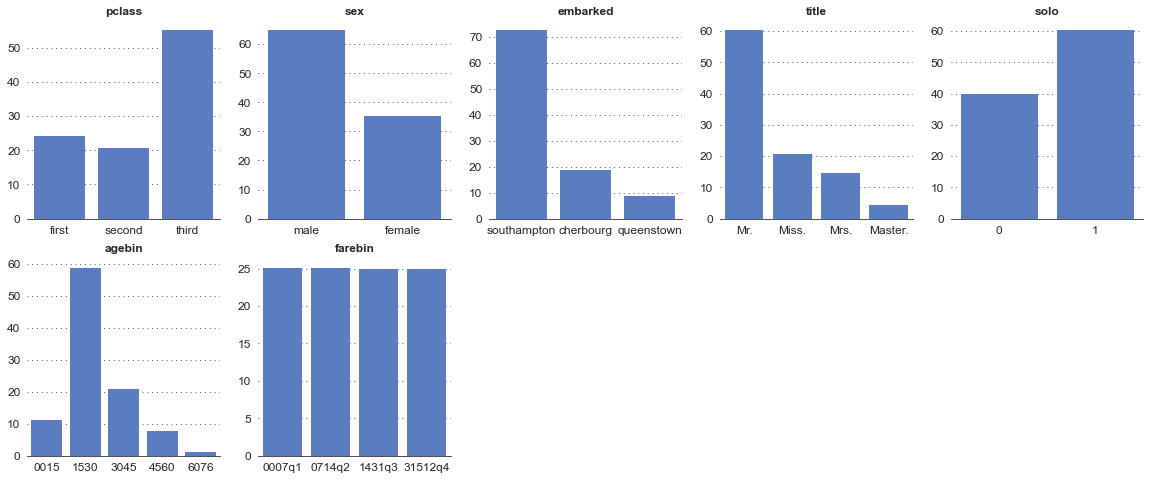

In [33]:
fig = plt.figure(figsize = (20, 8))
gs = fig.add_gridspec(2, 5)
gs.update(wspace = 0.2, hspace = 0.2)

run = 0

for row in range(2):
    for col in range(5):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        # locals()[f'ax{run}'].set_facecolor(background_color)
        for s in ['top', 'left', 'right']: 
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0 

for col in cat_features:
    df_chart = pd.DataFrame(df_vis[col].value_counts() / len(df_vis[col]) * 100)
    sns.barplot(x = df_chart.index, y = df_chart[col], ax = locals()[f'ax{run}'], zorder = 3, color = col_blue, edgecolor = 'black', linewidth = 0)
    locals()[f'ax{run}'].grid(which = 'major', axis = 'y', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
    locals()[f'ax{run}'].set_title(col, fontsize = 12, fontweight = 'bold')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1

locals()['ax7'].remove()
locals()['ax8'].remove()
locals()['ax9'].remove()

<a id='continuous_eda'></a>

## 5.2 Continuous Features EDA 

[back to top](#table_of_contents)

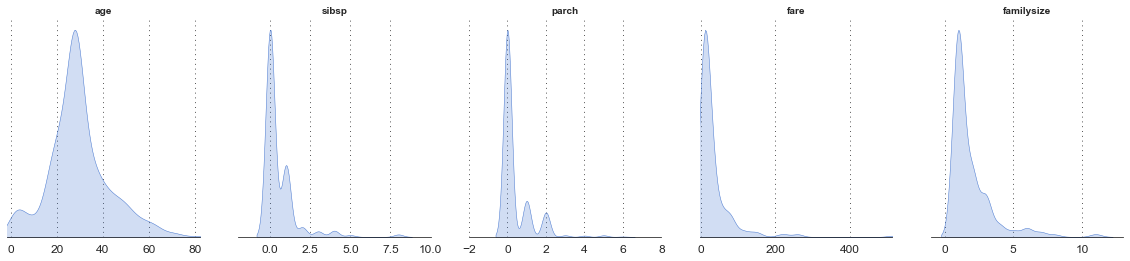

In [34]:
fig = plt.figure(figsize = (20, 4))
gs = fig.add_gridspec(1, 5)
gs.update(wspace = 0.2, hspace = 0.2)

run = 0

for row in range(1):
    for col in range(5):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        locals()[f'ax{run}'].set_yticklabels([])
        locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        for s in ['top', 'right', 'left']:
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0

for col in cont_features:
    sns.kdeplot(df_vis[col], ax = locals()[f'ax{run}'], shade = True, linewidth = 0.5)
    locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].set_title(col, fontsize = 10, fontweight = 'bold')
    locals()[f'ax{run}'].set_xlim(df[col].min() - 2, df[col].max() + 2)
    locals()[f'ax{run}'].set_xlabel('')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1

<a id='data_recheck'></a>

## 5.3 Data Recheck

#### Observations
* Double check data and splits by category
* Middle aged passengers were more likely to not survive
* Women were more likely to survive
* Solo passengers were more likely to not survive 
* Lower class / lower fare passengers were more likely to not survive

[back to top](#table_of_contents)

In [35]:
display(df.isna().sum())

survived           0
pclass             0
name               0
sex                0
age                0
sibsp              0
parch              0
fare               0
embarked           0
maiden           748
title              0
familysize         0
solo               0
farebin            0
agebin             0
pclass_code        0
sex_code           0
embarked_code      0
title_code         0
solo_code          0
agebin_code        0
farebin_code       0
dtype: int64

In [36]:
# drop maiden 
df.drop('maiden', axis=1, inplace=True)

#### Generate a general pairplot to visualize the category splits  

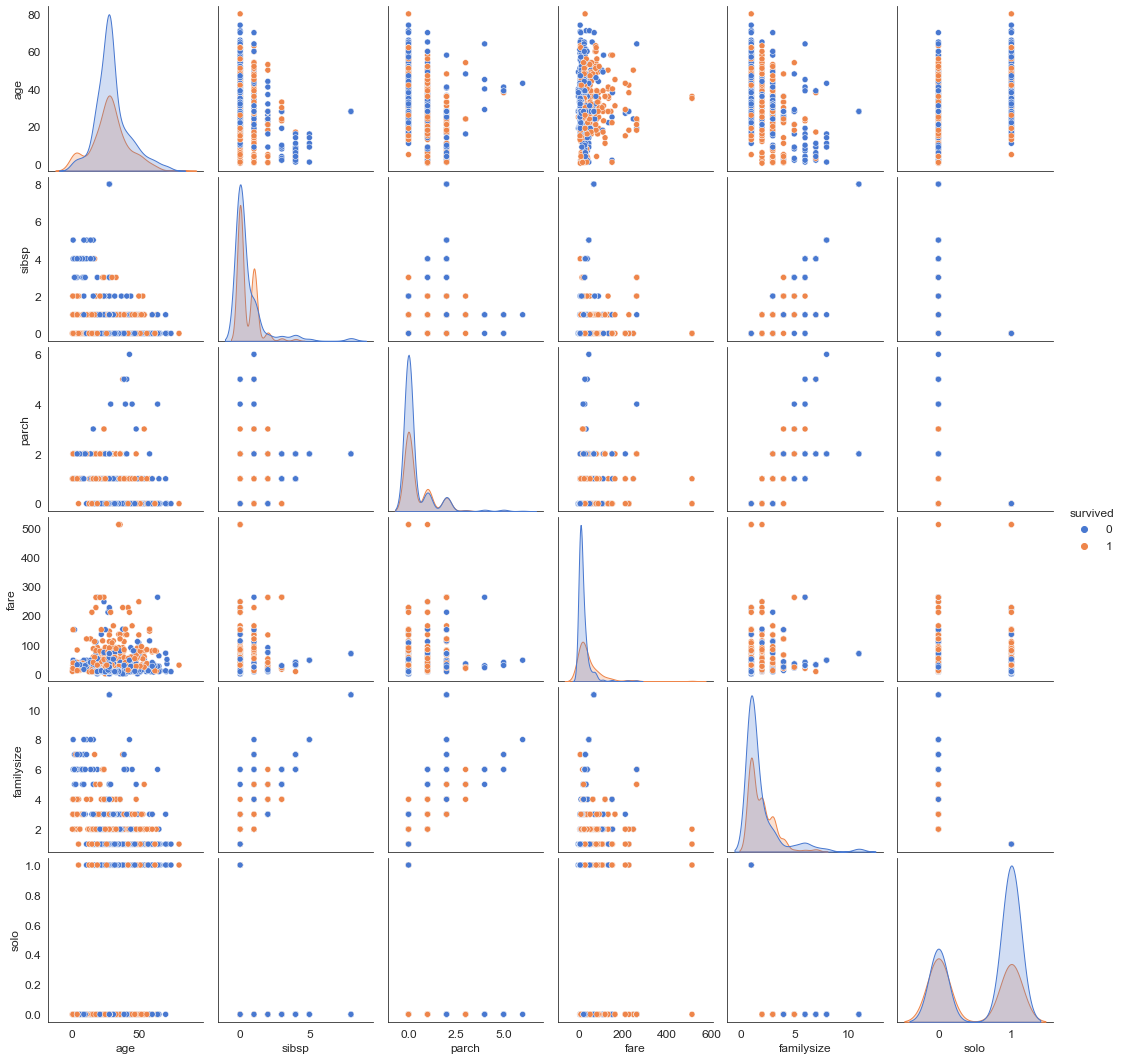

In [37]:
sns.pairplot(df_vis, hue='survived', diag_kind='kde', diag_kws={'shade': True})
plt.show()

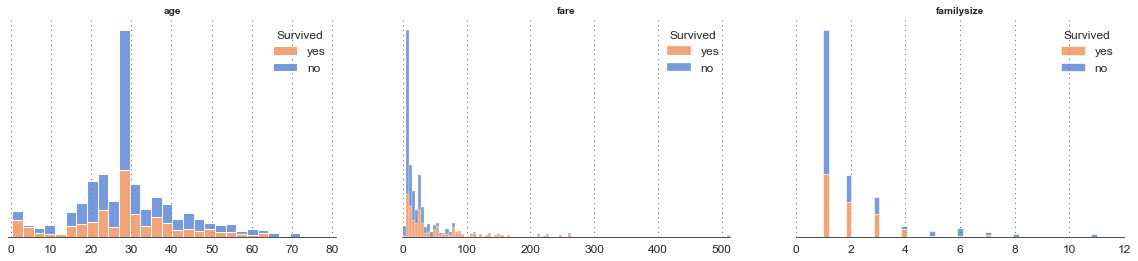

In [42]:
## stacked for continous type features

fig = plt.figure(figsize = (20, 4), facecolor = 'white')
gs = fig.add_gridspec(1, 3)
gs.update(wspace = 0.2, hspace = 0.2)

run = 0

for row in range(1):
    for col in range(3):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        locals()[f'ax{run}'].set_yticklabels([])
        locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        for s in ['top', 'right', 'left']:
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0

survived_filt = (df_vis['survived'] == 1)

for col in ['age', 'fare', 'familysize']:
    sns.histplot(df_vis, x = col, hue = 'survived', ax = locals()[f'ax{run}'], multiple = 'stack')
    locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].set_title(col, fontsize = 10, fontweight = 'bold')
    locals()[f'ax{run}'].legend(title = 'Survived', labels = ['yes', 'no'], facecolor = 'white', frameon = False)
    locals()[f'ax{run}'].set_xlim(df_vis[col].min() - 1, df_vis[col].max() + 1)
    locals()[f'ax{run}'].set_xlabel('')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1

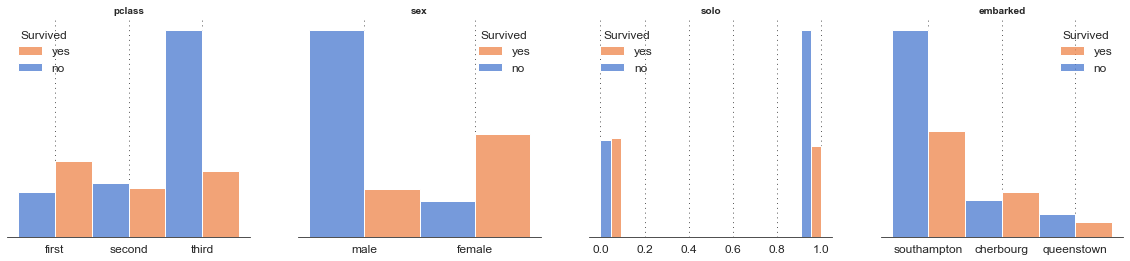

In [43]:
## dodge method for categorical type features

fig = plt.figure(figsize = (20, 4))
gs = fig.add_gridspec(1, 4)
gs.update(wspace = 0.2, hspace = 0.2)

run = 0

for row in range(1):
    for col in range(4):
        locals()[f'ax{run}'] = fig.add_subplot(gs[row, col])
        locals()[f'ax{run}'].set_yticklabels([])
        locals()[f'ax{run}'].tick_params(axis = 'y', which = 'both', length = 0)
        for s in ['top', 'right', 'left']:
            locals()[f'ax{run}'].spines[s].set_visible(False)
        run += 1

run = 0

survived_filt = (df_vis['survived'] == 1)

for col in ['pclass', 'sex', 'solo', 'embarked']:
    sns.histplot(df_vis, x = col, hue = 'survived', ax = locals()[f'ax{run}'], multiple = 'dodge')
    locals()[f'ax{run}'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))
    locals()[f'ax{run}'].legend(title = 'Survived', labels = ['yes', 'no'], facecolor = 'white', frameon = False)
    locals()[f'ax{run}'].set_title(col, fontsize = 10, fontweight = 'bold')
    locals()[f'ax{run}'].set_xlabel('')
    locals()[f'ax{run}'].set_ylabel('')
    run += 1

<a id='correlations'></a>

## 5.4 Correlations 

#### Observations 
* The goal is to see if we can identify any associations in the data. We start with plotting a heatmap of pairwise correlations across all variables
* High correlated features: solo / familysize / spsib / parch (all measure whether the passengers were alone to some degree)
* Moderate correlations: pclass / fare (lower ticket fare - likely to be lower passenger class)

[back to top](#table_of_contents)

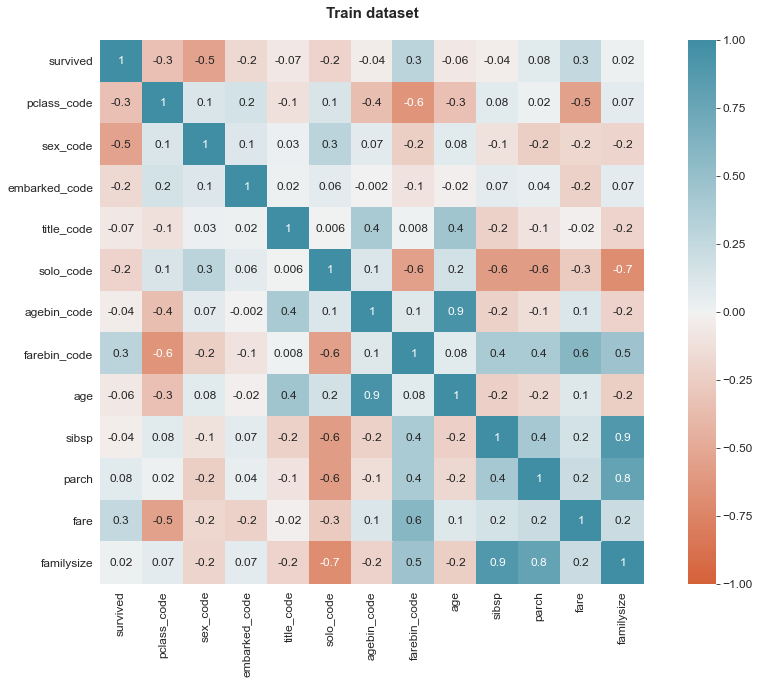

In [44]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)

ax0 = fig.add_subplot(gs[0, 0])

cmap1 = sns.diverging_palette(22, 219, s = 80, l = 55, as_cmap = True)

sns.heatmap(df[[target] + X_bins + cont_features].corr(), 
            ax = ax0, vmin = -1, vmax = 1, 
            annot = True, square = True, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Train dataset\n', fontsize = 15, fontweight = 'bold')
ax0.set_xticklabels(df[[target] + X_bins + cont_features], rotation = 90)
# ax0.set_yticklabels(rotation = 0)

plt.show()

<a id='modelling'></a>

## 6. Modelling

#### Observations
* The modelling strategy involves first conducting a general sweep across the various algorithms (w/o tuning) to record performance
* The blind run results allow us to determine feasible next steps to proceed in modelling
* Best performing models without hyperparameter tuning: Tree-based models like ExtraTreesClassifier (conceptually very similar to Random Forests), RandomForestClassifier, XGBClassifier

[back to top](#table_of_contents)

<a id = 'blind'></a>

## 6.1 Blind runs

#### Initial modelling exploration without tuning any hyperparameters

[back to top](#table_of_contents)

In [45]:
# Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    AdaBoostClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),

    #Gaussian Processes
    GaussianProcessClassifier(),
    
    #GLM
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron(),
    
    #Naive Bayes
    BernoulliNB(),
    GaussianNB(),
    
    #Nearest Neighbor
    KNeighborsClassifier(),
    
    #SVM
    SVC(probability=True),
    NuSVC(probability=True),
    LinearSVC(),
    
    #Trees    
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    
    #xgboost
    xgb.XGBClassifier(use_label_encoder = False)    
    ]


# split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
# note: this is an alternative to train_test_split
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 123) # run model 10x with 60/30 split intentionally leaving out 10%

# Instantiate a DataFrame to compare MLA metrics and store the predictions 
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = pd.DataFrame(df_dummy[target])

# Indexing through the list of algorithms in MLA, save the performance of each algorithm to MLA_compare
row_index = 0

for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation from model_selection
    cv_results = cross_validate(alg, df_dummy[X_features], df_dummy[target], cv = cv_split, return_train_score = True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    # assuming a normally distributed random sample, then +/-3 standard deviations (std) from the mean should capture 99.7% of the possible values 
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3   #let's know the worst that can happen!
    
    # Save MLA predictions 
    alg.fit(df_dummy[X_features], df_dummy[target])
    MLA_predict[MLA_name] = alg.predict(df_dummy[X_features])
    
    row_index += 1

    
# Sort and print DataFrames
MLA_compare.sort_values(by = ['MLA Train Accuracy Mean'], ascending = False, inplace = True)
display(MLA_compare)
MLA_predict

[09:50:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:50:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:50:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:50:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.875468,0.803731,0.057341,0.105441
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.875468,0.809328,0.051893,0.160336
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.875468,0.795896,0.057527,0.002925
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.875468,0.804104,0.062175,0.003292
19,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.875094,0.808582,0.067546,0.254194
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.872285,0.804478,0.045111,0.017565
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.853558,0.81903,0.060748,0.065167
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.847566,0.816418,0.062886,0.32299
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.845131,0.79291,0.083656,0.004086
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.839888,0.817537,0.053086,0.068069


,survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,...,Perceptron,BernoulliNB,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier,XGBClassifier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,1,1,1,...,1,1,1,0,0,1,1,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
887,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
888,0,0,0,0,0,0,0,0,1,1,...,0,1,1,0,0,1,0,0,0,0
889,1,1,0,0,0,0,0,1,1,1,...,1,0,0,0,0,0,1,0,0,0


#### Plot train and test accuracy scores

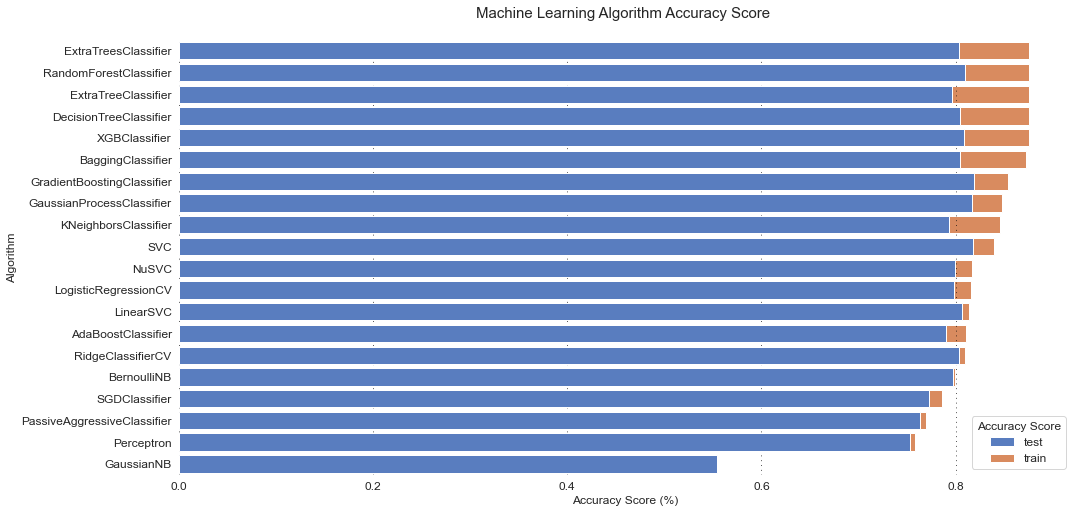

In [46]:
fig = plt.figure(figsize = (16, 8))
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

sns.barplot(x = 'MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, ax = ax0, color = col_blue, label = 'test')
sns.barplot(x = 'MLA Train Accuracy Mean', y = 'MLA Name', data = MLA_compare, ax = ax0, zorder = 0, color = col_orange, label = 'train')

for s in ['top', 'right', 'left', 'bottom']: 
    locals()['ax0'].spines[s].set_visible(False)

locals()['ax0'].legend(title = 'Accuracy Score')
locals()['ax0'].set_title('Machine Learning Algorithm Accuracy Score \n', fontsize = 15)
locals()['ax0'].grid(which = 'major', axis = 'x', zorder = 0, color = 'black', linestyle = ':', dashes = (1,5))    
locals()['ax0'].set_xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

plt.show()

#### Observations 
 
* Tree-based models, especially ensemble methods like RandomForest and BaggingClassifiers seem to outperform the other algorithms
* Strategy will be to proceed with hyperparameter tuning for tree-based ensembles
* Another approach to try will be to build a custom voting ensemble using different classifiers


<a id='tuning'></a>

## 7. Model tuning

#### General approach  
* Running correlations to see which classifiers have little correlation with each other
* Tuning RF, GNB, LinearSVC classifiers

[back to top](#table_of_contents)

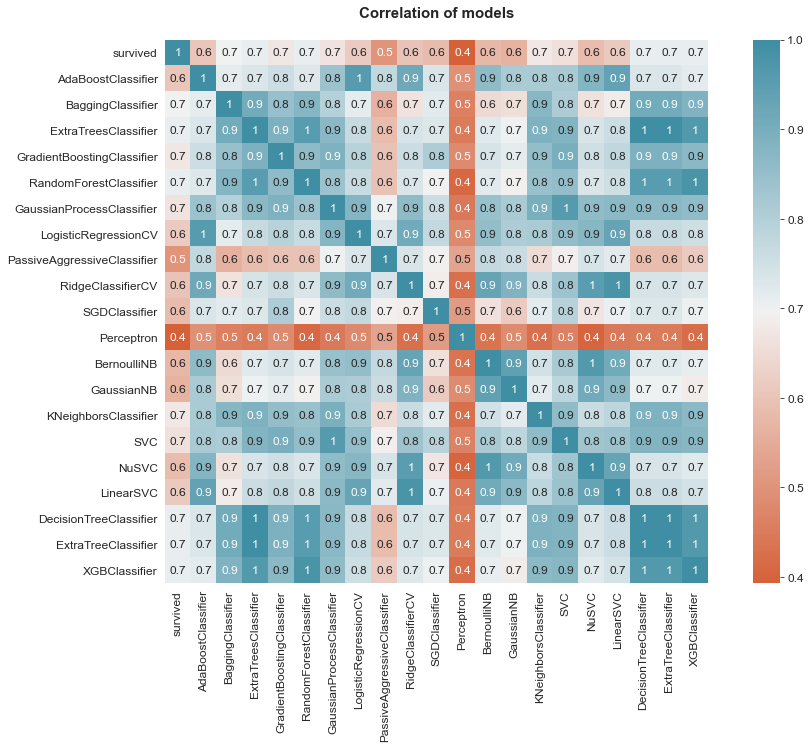

In [47]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

sns.heatmap(MLA_predict.corr(), 
            ax = ax0, vmax = 1, 
            annot = True, square = True, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Correlation of models\n', fontsize = 15, fontweight = 'bold')
ax0.set_xticklabels(MLA_predict.columns, rotation = 90)
# ax0.set_yticklabels(rotation = 0)

plt.show()

<a id = 'feature_selection'></a>

## 7.1.1 Feature Selection (base RF) 

#### The goal is to reduce the dimensionality of the dataset while retaining the predictive capacity of the model

* Approach using the recursive feature elimination (RFE) algorithm from sklearn, which recursively determines the least important feature per iteration
* Variables dropped: 'agebin_4560', 'agebin_6076'

[back to top](#table_of_contents)

In [48]:
# Instantiate a base model
rf = RandomForestClassifier(random_state = 123)

# Score model with cross validation from model_selection
base_results = cross_validate(rf, df_dummy[X_features], df_dummy[target], cv = cv_split, return_train_score = True)
rf.fit(df_dummy[X_features], df_dummy[target])

print(f'Train set variables before RFE: {df_dummy[X_features].shape[1]}')
print(f'Train set columns before RFE: {df_dummy[X_features].columns.values}')

print('*' * 100)

print(f'Before RFE train accuracy: {base_results["train_score"].mean() * 100:.2f}%')
print(f'Before RFE test accuracy: {base_results["test_score"].mean() * 100:.2f}%')
print(f'Before RFE test 3 STD: +/- {base_results["test_score"].std() * 100 * 3:.2f}%')

Train set variables before RFE: 16
Train set columns before RFE: ['solo' 'pclass_second' 'pclass_third' 'sex_male' 'embarked_cherbourg'
 'embarked_queenstown' 'title_miss' 'title_mr' 'title_mrs' 'agebin_1530'
 'agebin_3045' 'agebin_4560' 'agebin_6076' 'farebin_0714q2'
 'farebin_1431q3' 'farebin_31512q4']
****************************************************************************************************
Before RFE train accuracy: 87.55%
Before RFE test accuracy: 80.56%
Before RFE test 3 STD: +/- 7.14%


#### Using RFE, we can drop 2 variables (agebin_4560 agebin_6076) with minimal impact to model performance

In [49]:
# Feature selection
rf_rfe = RFECV(rf, step = 1, scoring = 'accuracy', cv = cv_split)
rf_rfe.fit(df_dummy[X_features], df_dummy[target])

# extract reduced features 
X_rfe = df_dummy[X_features].columns.values[rf_rfe.get_support()]
rfe_results = cross_validate(rf, df_dummy[X_rfe], df_dummy[target], cv  = cv_split, return_train_score = True)

print(f'After RFE train accuracy: {rfe_results["train_score"].mean() * 100:.2f}%')
print(f'After RFE test accuracy: {rfe_results["test_score"].mean() * 100:.2f}%')
print(f'After RFE test 3 STD: +/- {rfe_results["test_score"].std() * 100 * 3:.2f}%')

print('*' * 100)

print(f'Train set variables after RFE: {df_dummy[X_rfe].shape[1]}')
print(f'Train set columns after RFE: {df_dummy[X_rfe].columns.values}')

After RFE train accuracy: 87.30%
After RFE test accuracy: 81.46%
After RFE test 3 STD: +/- 6.33%
****************************************************************************************************
Train set variables after RFE: 14
Train set columns after RFE: ['solo' 'pclass_second' 'pclass_third' 'sex_male' 'embarked_cherbourg'
 'embarked_queenstown' 'title_miss' 'title_mr' 'title_mrs' 'agebin_1530'
 'agebin_3045' 'farebin_0714q2' 'farebin_1431q3' 'farebin_31512q4']


<a id = 'rf_hyper'></a>

## 7.1.2 RF Hyperparameter Tuning 

#### Random Forests have several hyperparameters which control for tree complexity
* Approach using RandomizedSearchCV and RFE features due to the number of possible parameter combinations
* Best performing model with smaller depth of 6, n_estimators of 50

[back to top](#table_of_contents)

In [50]:
# Base model
rf = RandomForestClassifier(random_state = 123)

# Score model with cross validation from model_selection
rfe_results = cross_validate(rf, df_dummy[X_rfe], df_dummy[target], cv = cv_split, return_train_score = True)
rf.fit(df_dummy[X_rfe], df_dummy[target])

print(f'Parameters for {rf.__class__.__name__}: {rf.get_params()}')
print(f'Before tuning train accuracy: {rfe_results["train_score"].mean() * 100:.2f}%')
print(f'Before tuning test accuracy: {rfe_results["test_score"].mean() * 100:.2f}%')
print(f'Before tuning test 3 STD: +/- {rfe_results["test_score"].std() * 100 * 3:.2f}%')
print('*' * 100)

Parameters for RandomForestClassifier: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}
Before tuning train accuracy: 87.30%
Before tuning test accuracy: 81.46%
Before tuning test 3 STD: +/- 6.33%
****************************************************************************************************


In [51]:
# Setup the hyperparameter grid 
param_grid = {'criterion': ['gini', 'entropy'], # Function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
              #'splitter': ['best', 'random'], # Strategy used to choose the split at each node - supported strategies are "best" to choose the best split and "random" to choose the best random split
              'max_depth': [2,4,6,8,10,None], # Max depth tree can grow; default is none
              'min_samples_leaf': [1,5,10,.03,.05], # Minimum subset size after new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], # Max features to consider when performing split; default none or all
              'n_estimators': [20, 50, 100, 200, 500] # No. of trees to estimate
             }

# Cross validate model with RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 25, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
rf_cv.fit(df_dummy[X_rfe], df_dummy[target])

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=123, test_size=0.3, train_size=0.6),
                   estimator=RandomForestClassifier(random_state=123),
                   n_iter=25,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, None],
                                        'max_features': [None, 'auto'],
                                        'min_samples_leaf': [1, 5, 10, 0.03,
                                                             0.05],
                                        'n_estimators': [20, 50, 100, 200,
                                                         500]},
                   return_train_score=True, scoring='roc_auc')

In [52]:
print(f"{rf_cv.best_estimator_} best score: {rf_cv.best_score_ * 100:.2f}%")

print(f"After tuning train accuracy: {rf_cv.cv_results_['mean_train_score'][rf_cv.best_index_] * 100:.2f}%")
print(f"After tuning test accuracy: {rf_cv.cv_results_['mean_test_score'][rf_cv.best_index_] * 100:.2f}%")
print(f"After tuning test 3 STD: {rf_cv.cv_results_['std_test_score'][rf_cv.best_index_] * 100 * 3:.2f}%")
print('*' * 100)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=None,
                       min_samples_leaf=5, n_estimators=200, random_state=123) best score: 86.13%
After tuning train accuracy: 91.42%
After tuning test accuracy: 86.13%
After tuning test 3 STD: 6.77%
****************************************************************************************************


<a id = 'lrtuning'></a>

## 7.2 Logistic Regression Tuning

#### Model complexity is primarily controlled by C - smaller C indicates higher regulation  
* Approach using GridSearchCV and RFE features as there are only 4 possibilities to iterate over
* Best performing model with larger value of C for lesser regulation

[back to top](#table_of_contents)

In [68]:
# Base model
lr = LogisticRegressionCV(random_state = 123, n_jobs = -1)

# Score model with cross validation from model_selection
rfe_results = cross_validate(lr, df_dummy[X_rfe], df_dummy[target], cv = cv_split, return_train_score = True)
lr.fit(df_dummy[X_rfe], df_dummy[target])

print(f'Parameters for {lr.__class__.__name__}: {lr.get_params()}')
print(f'Before tuning train accuracy: {rfe_results["train_score"].mean() * 100:.2f}%')
print(f'Before tuning test accuracy: {rfe_results["test_score"].mean() * 100:.2f}%')
print(f'Before tuning test 3 STD: +/- {rfe_results["test_score"].std() * 100 * 3:.2f}%')
print('*' * 100)

Parameters for LogisticRegressionCV: {'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l2', 'random_state': 123, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}
Before tuning train accuracy: 81.46%
Before tuning test accuracy: 80.15%
Before tuning test 3 STD: +/- 5.50%
****************************************************************************************************


In [69]:
# Setup the hyperparameter grid 
param_grid = {'Cs': [1, 10, 100, 200], # Describes the inverse of regularization strength, smaller values specify stronger regularization
              # 'penalty': ['l1', 'l2'], # Specifies norm used in the penalization 
              # 'solver': ['newton-cg', 'lbfgs', 'liblinear'], #minimum subset size after new split split (fraction is % of total); default is 1
             }

# Cross validate model using GridSearch
lr_cv = GridSearchCV(estimator = lr, param_grid = param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
lr_cv.fit(df_dummy[X_rfe], df_dummy[target])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=123, test_size=0.3, train_size=0.6),
             estimator=LogisticRegressionCV(n_jobs=-1, random_state=123),
             param_grid={'Cs': [1, 10, 100, 200]}, return_train_score=True,
             scoring='roc_auc')

In [70]:
print(f"{lr_cv.best_estimator_} best score: {lr_cv.best_score_ * 100:.2f}%")

print(f"After tuning train accuracy: {lr_cv.cv_results_['mean_train_score'][lr_cv.best_index_] * 100:.2f}%")
print(f"After tuning test accuracy: {lr_cv.cv_results_['mean_test_score'][lr_cv.best_index_] * 100:.2f}%")
print(f"After tuning test 3 STD: {lr_cv.cv_results_['std_test_score'][lr_cv.best_index_] * 100 * 3:.2f}%")
print('*' * 100)

LogisticRegressionCV(Cs=100, n_jobs=-1, random_state=123) best score: 85.74%
After tuning train accuracy: 86.74%
After tuning test accuracy: 85.74%
After tuning test 3 STD: 6.01%
****************************************************************************************************


<a id = 'knntuning'></a>

## 7.3 KNN Tuning

#### Primary parameters to tune include the distance metric and n_neighbors

* Approach using GridSearchCV and RFE features as the parameter combinations are manageable

[back to top](#table_of_contents)

In [73]:
#base model
knn = KNeighborsClassifier(n_jobs = -1)

#score model with cross validation from model_selection
rfe_results = cross_validate(knn, df_dummy[X_rfe], df_dummy[target], cv = cv_split, return_train_score = True)
knn.fit(df_dummy[X_rfe], df_dummy[target])

print(f'Parameters for {knn.__class__.__name__}: {knn.get_params()}')
print(f'Before tuning train accuracy: {rfe_results["train_score"].mean() * 100:.2f}%')
print(f'Before tuning test accuracy: {rfe_results["test_score"].mean() * 100:.2f}%')
print(f'Before tuning test 3 STD: +/- {rfe_results["test_score"].std() * 100 * 3:.2f}%')
print('*' * 100)

Parameters for KNeighborsClassifier: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Before tuning train accuracy: 84.27%
Before tuning test accuracy: 78.96%
Before tuning test 3 STD: +/- 7.22%
****************************************************************************************************


In [74]:
# Setup the hyperparameter grid 
param_grid = {'n_neighbors': [2, 4, 6, 8], # Number of neighbors
              'weights': ['uniform', 'distance'], # Weight function used in prediction; distance weights points by inverse of distance 
              'algorithm': ['auto'], # algorithm to compute nearest neighbors - auto finds the most optimized algo
              'metric': ['minkowski', 'manhattan'] # distance metric to minimize: minkowski w/ p of 2 is equivalent to euclidean 
             }

# Cross validate model with RandomizedSearchCV
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
knn_cv.fit(df_dummy[X_rfe], df_dummy[target])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=123, test_size=0.3, train_size=0.6),
             estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'algorithm': ['auto'],
                         'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [2, 4, 6, 8],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='roc_auc')

In [75]:
print(f"{knn_cv.best_estimator_} best score: {knn_cv.best_score_ * 100:.2f}%")

print(f"After tuning train accuracy: {knn_cv.cv_results_['mean_train_score'][knn_cv.best_index_] * 100:.2f}%")
print(f"After tuning test accuracy: {knn_cv.cv_results_['mean_test_score'][knn_cv.best_index_] * 100:.2f}%")
print(f"After tuning test 3 STD: {knn_cv.cv_results_['std_test_score'][knn_cv.best_index_] * 100 * 3:.2f}%")
print('*' * 100)

KNeighborsClassifier(n_jobs=-1, n_neighbors=8) best score: 84.08%
After tuning train accuracy: 89.31%
After tuning test accuracy: 84.08%
After tuning test 3 STD: 7.69%
****************************************************************************************************


<a id = 'svctuning'></a>

## 7.4 SVC Tuning

#### Primary parameters to tune include C and the kernel function

* Approach using GridSearchCV and RFE features as the parameter combinations are manageable

[back to top](#table_of_contents)

In [58]:
#base model
svc = SVC(probability = True)

#score model with cross validation from model_selection
rfe_results = cross_validate(svc, df_dummy[X_rfe], df_dummy[target], cv = cv_split, return_train_score = True)
svc.fit(df_dummy[X_rfe], df_dummy[target])

print(f'Parameters for {svc.__class__.__name__}: {svc.get_params()}')
print(f'Before tuning train accuracy: {rfe_results["train_score"].mean() * 100:.2f}%')
print(f'Before tuning test accuracy: {rfe_results["test_score"].mean() * 100:.2f}%')
print(f'Before tuning test 3 STD: +/- {rfe_results["test_score"].std() * 100 * 3:.2f}%')
print('*' * 100)

Parameters for SVC: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Before tuning train accuracy: 84.12%
Before tuning test accuracy: 82.24%
Before tuning test 3 STD: +/- 5.11%
****************************************************************************************************


In [59]:
# Setup the hyperparameter grid 
param_grid = {'C': [1, 10, 20, 50, 100], # regularization param: higher C = less regularization 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] # specifies kernel type to be used 
             }
    
# Cross validate model with RandomizedSearchCV
svc_cv = GridSearchCV(estimator = svc, param_grid = param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
svc_cv.fit(df_dummy[X_rfe], df_dummy[target])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=123, test_size=0.3, train_size=0.6),
             estimator=SVC(probability=True),
             param_grid={'C': [1, 10, 20, 50, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='roc_auc')

In [61]:
print(f"{svc_cv.best_estimator_} best score: {svc_cv.best_score_ * 100:.2f}%")

print(f"After tuning train accuracy: {svc_cv.cv_results_['mean_train_score'][svc_cv.best_index_] * 100:.2f}%")
print(f"After tuning test accuracy: {svc_cv.cv_results_['mean_test_score'][svc_cv.best_index_] * 100:.2f}%")
print(f"After tuning test 3 STD: {svc_cv.cv_results_['std_test_score'][svc_cv.best_index_] * 100 * 3:.2f}%")
print('*' * 100)

SVC(C=1, probability=True) best score: 85.11%
After tuning train accuracy: 88.81%
After tuning test accuracy: 85.11%
After tuning test 3 STD: 7.32%
****************************************************************************************************


<a id = 'ensemble'></a>

## 8. Building an Ensemble Model 

#### Notes

* Given classifiers that we have tuned, we can consider two possible ensembles as the final model: a custom Voting Classifier or a Random Forest

[back to top](#table_of_contents)

<a id = 'selection'></a>

## 8.1 Classifier Selection

[back to top](#table_of_contents)

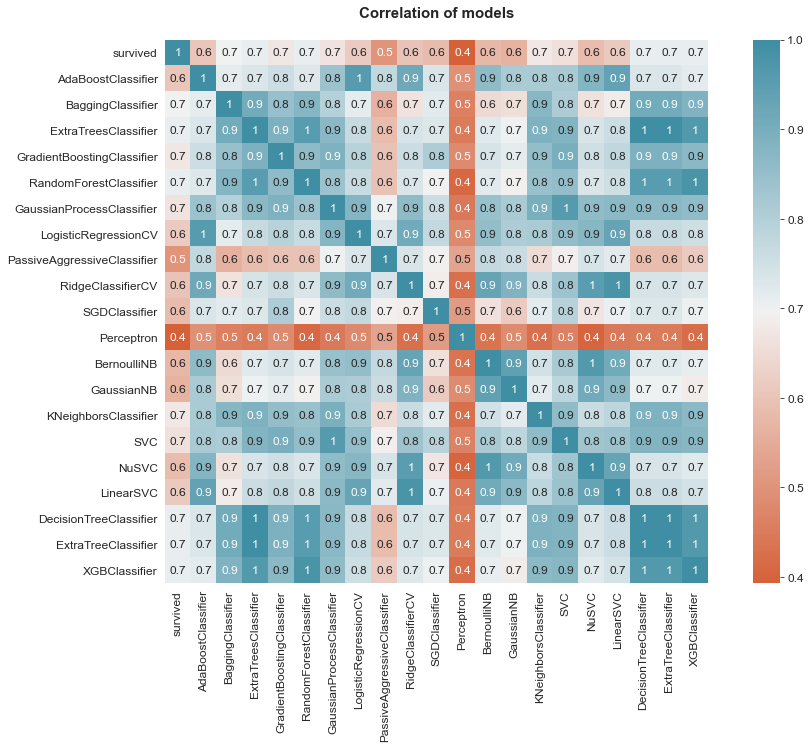

In [65]:
fig = plt.figure()
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

sns.heatmap(MLA_predict.corr(), 
            ax = ax0, vmax = 1, 
            annot = True, square = True, 
            cbar = True, cmap = cmap1, 
            fmt = '.1g')
ax0.set_title('Correlation of models\n', fontsize = 15, fontweight = 'bold')
ax0.set_xticklabels(MLA_predict.columns, rotation = 90)
# ax0.set_yticklabels(rotation = 0)

plt.show()

In [76]:
# Remove models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
       
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', AdaBoostClassifier()),
    # ('bc', BaggingClassifier()),
    # ('etc',ExtraTreesClassifier()),
    # ('gbc', GradientBoostingClassifier()),
    ('rfc', rf_cv.best_estimator_),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    # ('gpc', GaussianProcessClassifier()),
    
    # GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', lr_cv.best_estimator_),
    # ('pac', PassiveAggressiveClassifier()),
    # ('rc', RidgeClassifierCV()),
    # ('sgd', SGDClassifier()),
    # ('per', Perceptron()),
    
    # Naive Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    # ('bnb', BernoulliNB()),
    # ('gnb', GaussianNB()),
    
    # Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', knn_cv.best_estimator_),
    
    # SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svc_cv.best_estimator_),
    # ('nusvc', NuSVC(probability = True)),
    # ('lsvc', LinearSVC(probability = True)),
    
    # xgb
    # ('xgb', XGBClassifier(use_label_encoder = False)
]

#### If hard voting, uses predicted class labels for majority rule voting, else if soft voting, predicts based on the argmax of the sums of pred probabilities 

In [77]:
# Voting classifier selection 

for v in ['hard', 'soft']: 
    vote = VotingClassifier(estimators = vote_est, voting = v, n_jobs = -1)
    vote_cv = cross_validate(vote, df_dummy[X_rfe], df_dummy[target], cv = cv_split, return_train_score = True)
    vote.fit(df_dummy[X_rfe], df_dummy[target])

    print(f'{v} voting train accuracy: {vote_cv["train_score"].mean() * 100:.2f}%')
    print(f'{v} voting test accuracy: {vote_cv["test_score"].mean() * 100:.2f}%')
    print(f'{v} voting 3 STD: +/- {vote_cv["test_score"].std() * 100 * 3:.2f}%')
    print('*' * 100)

hard voting train accuracy: 83.75%
hard voting test accuracy: 81.79%
hard voting 3 STD: +/- 6.60%
****************************************************************************************************
soft voting train accuracy: 84.38%
soft voting test accuracy: 81.34%
soft voting 3 STD: +/- 5.64%
****************************************************************************************************


#### Given that the voting classifiers are tuned models, soft voting might give a more nuanced result

In [78]:
# Instantiate and fit a soft voting classifier
soft_vote = VotingClassifier(estimators = vote_est, voting = 'soft', n_jobs = -1)
soft_vote.fit(df_dummy[X_rfe], df_dummy[target])

VotingClassifier(estimators=[('ada', AdaBoostClassifier()),
                             ('rfc',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=8,
                                                     max_features=None,
                                                     min_samples_leaf=5,
                                                     n_estimators=200,
                                                     random_state=123)),
                             ('lr',
                              LogisticRegressionCV(Cs=100, n_jobs=-1,
                                                   random_state=123)),
                             ('knn',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=8)),
                             ('svc', SVC(C=1, probability=True))],
                 n_jobs=-1, voting='soft')

<a id = 'evaluation'></a>

## 8.2 Evaluating ensembles 

#### Once we have defined both ensemble models, the next steps are to validate them 
* Compare random forest vs soft vote
* Define validation report 


[back to top](#table_of_contents)

In [90]:
def validation_report(cm, true, pred, normalize = False, title = ''):

    fmt = 'g'
    if normalize: 
        fmt = '.2g'
        
    fig = plt.figure()
    gs = fig.add_gridspec(1, 1)
    ax0 = fig.add_subplot(gs[0, 0])

    sns.heatmap(cm, square = True, 
                annot = True, annot_kws = {'fontsize': 15}, 
                cbar = True, cmap = cmap1, fmt = fmt)

    ax0.set_title(f'Confusion Matrix {title}\n', fontsize = 20, fontweight = 'bold')
    ax0.set_xlabel('\nPredicted', fontsize = 15, fontweight = 'bold')
    ax0.set_ylabel('True', fontsize = 15, fontweight = 'bold')
    ax0.set_xticklabels(['X', 'Survived'], fontsize = 15)
    ax0.set_yticklabels(['X', 'Survived'], fontsize = 15, rotation = 'horizontal')

    plt.show()

    precision = precision_score(true, pred, average = 'binary', sample_weight = None, zero_division = 'warn')
    recall = recall_score(true, pred, average = 'binary', sample_weight = None, zero_division = 'warn')
    f1 = f1_score(true, pred, average = 'binary', sample_weight = None, zero_division = 'warn')

    print(f"precision: {precision * 100:.2f}%")
    print(f"recall: {recall * 100:.2f}%")
    print(f"f1: {f1 * 100:.2f}%")
    print('*' * 100)

<a id = 'sveval'></a>

## 8.3 Soft Vote Evaluation

[back to top](#table_of_contents)

In [91]:
sv_pred = soft_vote.predict(df_dummy[X_rfe])
cm = confusion_matrix(df_dummy[target], sv_pred, normalize = 'true')

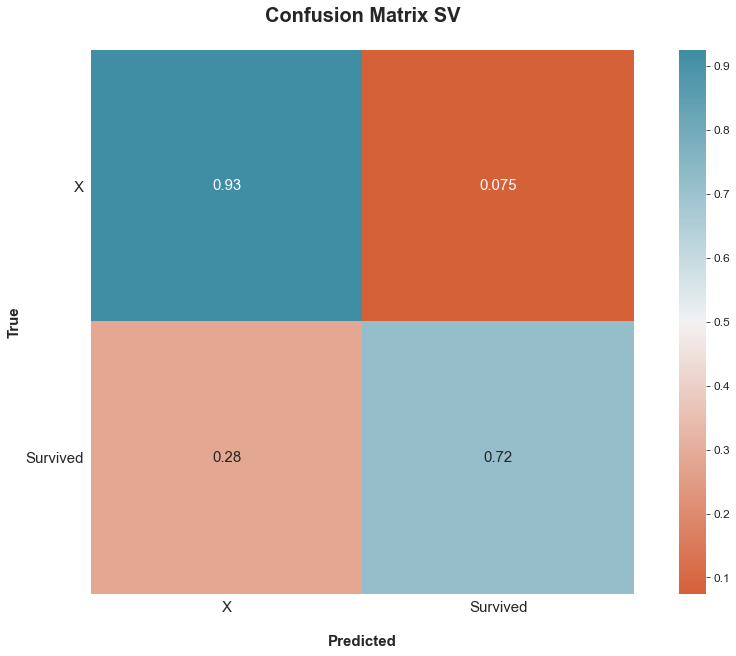

precision: 85.66%
recall: 71.64%
f1: 78.03%
****************************************************************************************************


In [92]:
validation_report(cm, df_dummy[target], sv_pred, normalize = True, title = 'SV')

#### Non normalized figures

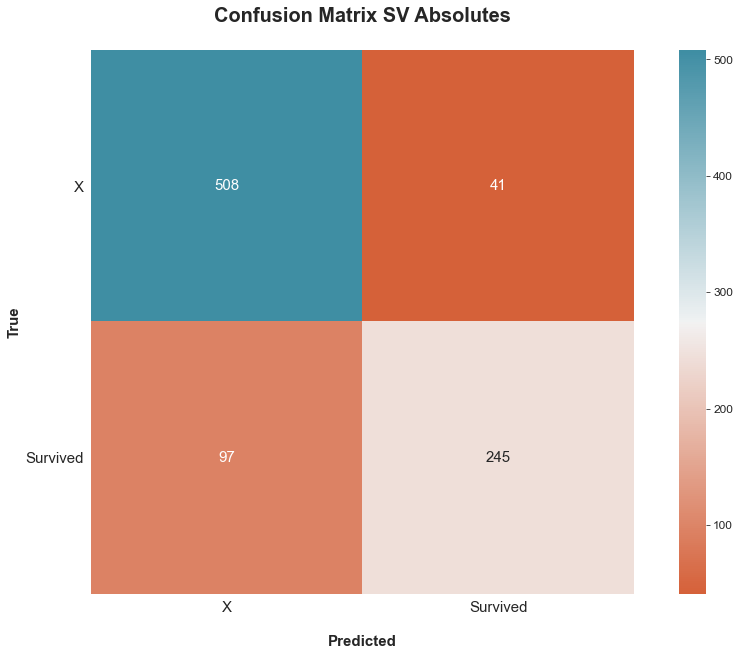

precision: 85.66%
recall: 71.64%
f1: 78.03%
****************************************************************************************************


In [95]:
cm = confusion_matrix(df_dummy[target], sv_pred, normalize = None)
validation_report(cm, df_dummy[target], sv_pred, normalize = False, title = 'SV Absolutes')

<a id = 'rfeval'></a>

## 8.4 Random Forest Evaluation

[back to top](#table_of_contents)

In [97]:
rf_pred = rf_cv.best_estimator_.predict(df_dummy[X_rfe])
rf_cm = confusion_matrix(df_dummy[target], rf_pred, normalize = 'true')

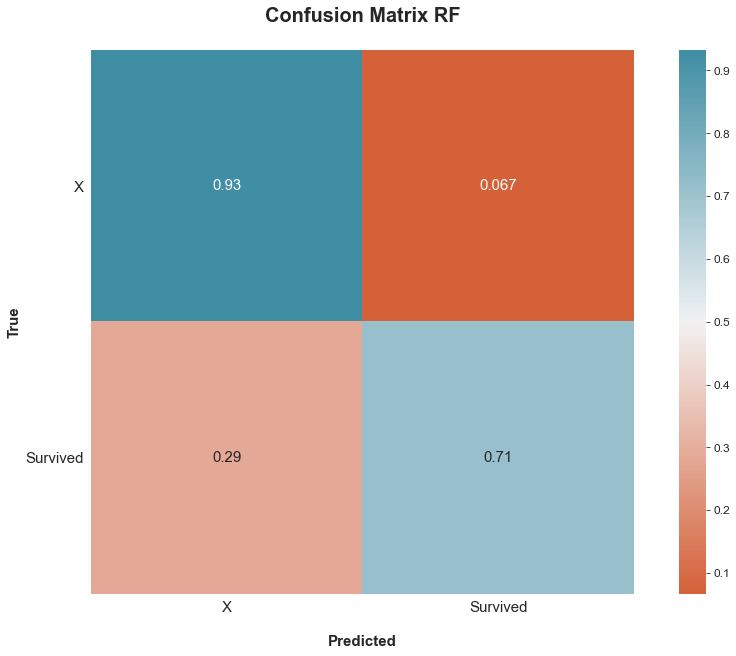

precision: 86.83%
recall: 71.35%
f1: 78.33%
****************************************************************************************************


In [98]:
validation_report(rf_cm, df_dummy[target], rf_pred, normalize = True, title = 'RF')

#### Non normalized figures

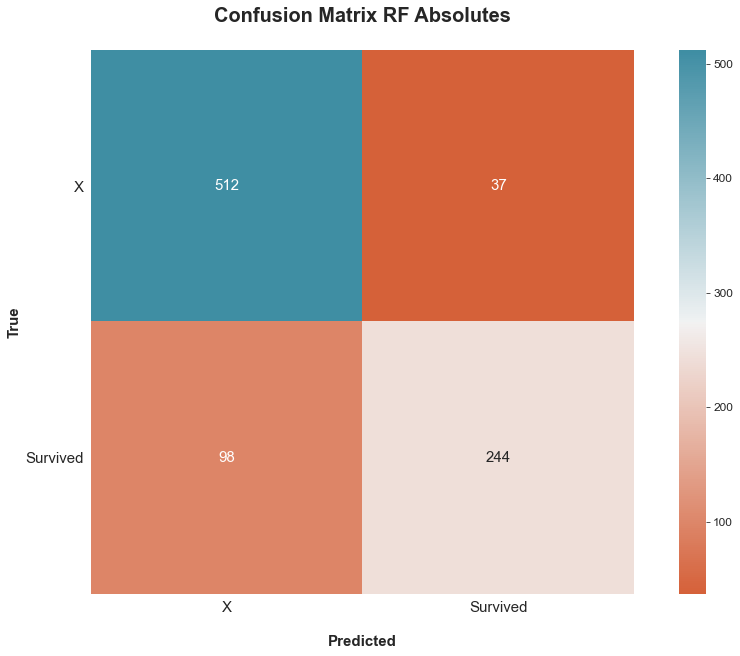

precision: 86.83%
recall: 71.35%
f1: 78.33%
****************************************************************************************************


In [100]:
rf_cm = confusion_matrix(df_dummy[target], rf_pred, normalize = None)
validation_report(rf_cm, df_dummy[target], rf_pred, normalize = False, title = 'RF Absolutes')

#### Both performances are very close, but Random Forest just slightly edges out the Soft Voting classifier

<a id = 'dt'></a>

## 9. Visualizing rules with a Decision Tree 

#### It might be useful to try to determine which features are more important to classification
* The process of training a Decision Tree Model involves
* Feature Selection
* Hyperparameter tuning

[back to top](#table_of_contents)

<a id = 'dtfs'></a>

## 9.1 Feature Selection for a base DT

#### Select non-important features to drop from the Decision Tree

[back to top](#table_of_contents)

In [101]:
#base model
dt = DecisionTreeClassifier(random_state = 123)

#score model with cross validation from model_selection
base_results_dt = cross_validate(dt, df_dummy[X_features], df_dummy[target], cv = cv_split, return_train_score = True)
dt.fit(df_dummy[X_features], df_dummy[target])

print(f'Train set variables before RFE: {df_dummy[X_features].shape[1]}')
print(f'Train set columns before RFE: {df_dummy[X_features].columns.values}')

print('*' * 100)

print(f'Before RFE train accuracy: {base_results["train_score"].mean() * 100:.2f}%')
print(f'Before RFE test accuracy: {base_results["test_score"].mean() * 100:.2f}%')
print(f'Before RFE test 3 STD: +/- {base_results["test_score"].std() * 100 * 3:.2f}%')

Train set variables before RFE: 16
Train set columns before RFE: ['solo' 'pclass_second' 'pclass_third' 'sex_male' 'embarked_cherbourg'
 'embarked_queenstown' 'title_miss' 'title_mr' 'title_mrs' 'agebin_1530'
 'agebin_3045' 'agebin_4560' 'agebin_6076' 'farebin_0714q2'
 'farebin_1431q3' 'farebin_31512q4']
****************************************************************************************************
Before RFE train accuracy: 87.55%
Before RFE test accuracy: 80.56%
Before RFE test 3 STD: +/- 7.14%


In [102]:
#feature selection
dt_rfe = RFECV(dt, step = 1, scoring = 'accuracy', cv = cv_split)
dt_rfe.fit(df_dummy[X_features], df_dummy[target])

# extract reduced features 
X_dt_rfe = df_dummy[X_features].columns.values[dt_rfe.get_support()]
rfe_results = cross_validate(dt, df_dummy[X_dt_rfe], df_dummy[target], cv  = cv_split, return_train_score = True)

print(f'After RFE train accuracy: {rfe_results["train_score"].mean() * 100:.2f}%')
print(f'After RFE test accuracy: {rfe_results["test_score"].mean() * 100:.2f}%')
print(f'After RFE test 3 STD: +/- {rfe_results["test_score"].std() * 100 * 3:.2f}%')

print('*' * 100)

print(f'Train set variables after RFE: {df_dummy[X_dt_rfe].shape[1]}')
print(f'Train set columns after RFE: {df_dummy[X_dt_rfe].columns.values}')

After RFE train accuracy: 86.69%
After RFE test accuracy: 80.45%
After RFE test 3 STD: +/- 6.14%
****************************************************************************************************
Train set variables after RFE: 12
Train set columns after RFE: ['solo' 'pclass_second' 'pclass_third' 'embarked_cherbourg' 'title_miss'
 'title_mr' 'agebin_1530' 'agebin_3045' 'agebin_4560' 'farebin_0714q2'
 'farebin_1431q3' 'farebin_31512q4']


<a id = 'dtht'></a>

## 9.2 DT Hyperparameter Tuning

[back to top](#table_of_contents)

In [103]:
#base model
dt = DecisionTreeClassifier(random_state = 123)

#score model with cross validation from model_selection
rfe_results = cross_validate(dt, df_dummy[X_rfe], df_dummy[target], cv = cv_split, return_train_score = True)
dt.fit(df_dummy[X_dt_rfe], df_dummy[target])

print(f'Parameters for {dt.__class__.__name__}: {dt.get_params()}')
print(f'Before tuning train accuracy: {rfe_results["train_score"].mean() * 100:.2f}%')
print(f'Before tuning test accuracy: {rfe_results["test_score"].mean() * 100:.2f}%')
print(f'Before tuning test 3 STD: +/- {rfe_results["test_score"].std() * 100 * 3:.2f}%')
print('*' * 100)

Parameters for DecisionTreeClassifier: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 123, 'splitter': 'best'}
Before tuning train accuracy: 87.30%
Before tuning test accuracy: 80.71%
Before tuning test 3 STD: +/- 6.39%
****************************************************************************************************


In [104]:
# Setup the hyperparameter grid 
param_grid = {'criterion': ['gini', 'entropy'], # Function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
              #'splitter': ['best', 'random'], #Strategy used to choose the split at each node - supported strategies are "best" to choose the best split and "random" to choose the best random split
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size after new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
             }

# Cross validate model with GridSearchCV
dt_cv = GridSearchCV(estimator = dt, param_grid = param_grid, scoring = 'roc_auc', cv = cv_split, return_train_score = True)
dt_cv.fit(df_dummy[X_dt_rfe], df_dummy[target])

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=123, test_size=0.3, train_size=0.6),
             estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05]},
             return_train_score=True, scoring='roc_auc')

In [105]:
print(dt_cv.best_estimator_)
print(dt_cv.best_score_)

print(f"After tuning train accuracy: {dt_cv.cv_results_['mean_train_score'][dt_cv.best_index_] * 100:.2f}%")
print(f"After tuning test accuracy: {dt_cv.cv_results_['mean_test_score'][dt_cv.best_index_] * 100:.2f}%")
print(f"After tuning test 3 STD: {dt_cv.cv_results_['std_test_score'][dt_cv.best_index_] * 100 * 3:.2f}%")
print('*' * 100)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10,
                       random_state=123)
0.8584518459690674
After tuning train accuracy: 89.87%
After tuning test accuracy: 85.85%
After tuning test 3 STD: 5.94%
****************************************************************************************************


<a id = 'dtviz'></a>

## 9.3 DT Graphviz

[back to top](#table_of_contents)

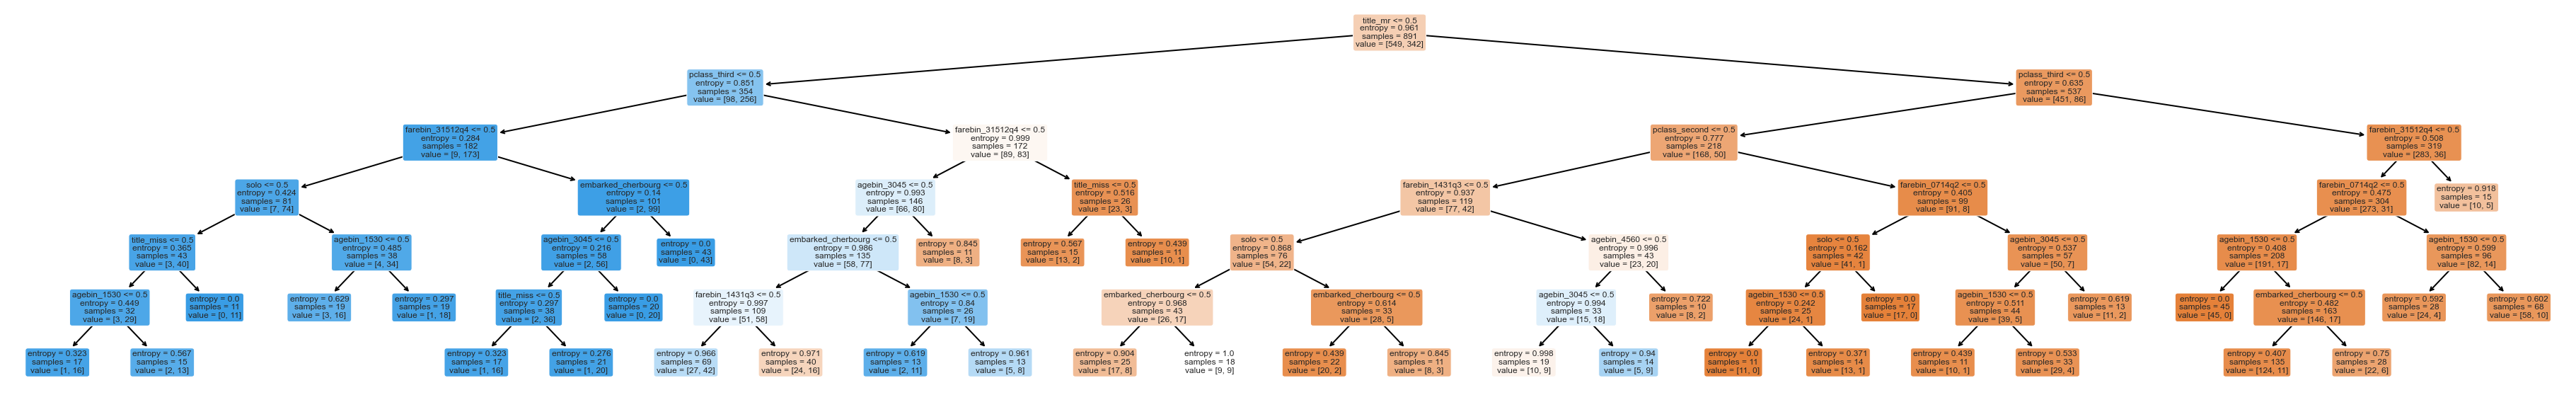

In [107]:
from sklearn import tree
plt.figure(figsize=(65,10))

_ = tree.plot_tree(dt_cv.best_estimator_, feature_names=X_dt_rfe, 
                   filled=True, fontsize=12, rounded=True)

for o in _:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

plt.show()